Saving and Storing models

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

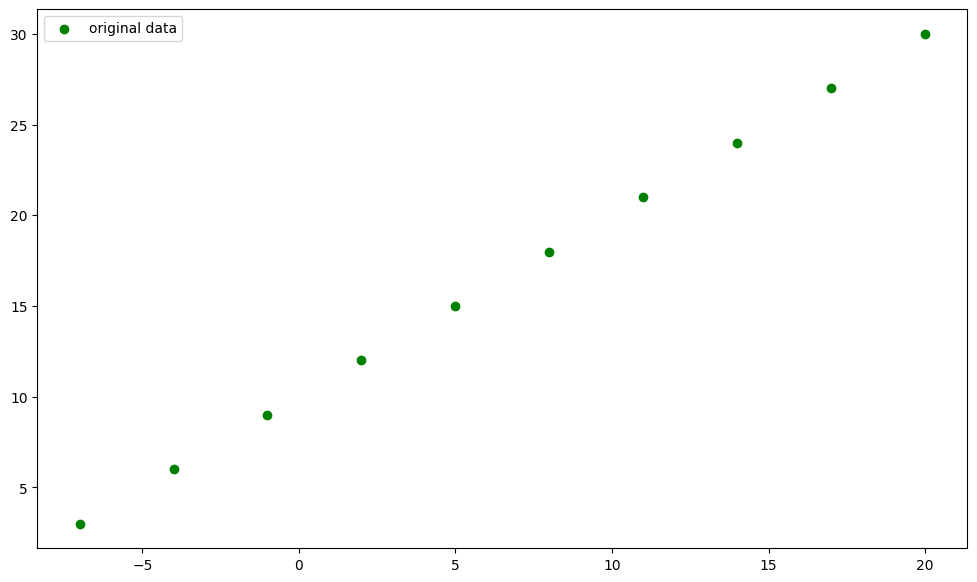

In [11]:
x_original = tf.range(start=-7, limit=-7 + 3 * 10, delta=3, dtype=tf.int32)
y_original = tf.range(start=3, limit=3 + 3 * 10, delta=3, dtype=tf.int32)

x = tf.identity(x_original)
y = tf.identity(y_original)

plt.figure(figsize=(12,7))
plt.scatter(x=x, y=y, c='green', label='original data')
plt.legend()
plt.show()

In [16]:
div = int(len(x)*0.7)

x_train = x[0:div]
y_train = y[0:div]

x_test = x[div:]
y_test = y[div:]

x = tf.reshape(x, (-1, 1))
y = tf.reshape(y, (-1, 1))

x_train = tf.reshape(x_train, (-1, 1))
y_train = tf.reshape(y_train, (-1, 1))

x_test = tf.reshape(x_test, (-1, 1))
y_test = tf.reshape(y_test, (-1, 1))

div, x_train, y_train, x_test, y_test

(7,
 <tf.Tensor: shape=(7, 1), dtype=int32, numpy=
 array([[-7],
        [-4],
        [-1],
        [ 2],
        [ 5],
        [ 8],
        [11]], dtype=int32)>,
 <tf.Tensor: shape=(7, 1), dtype=int32, numpy=
 array([[ 3],
        [ 6],
        [ 9],
        [12],
        [15],
        [18],
        [21]], dtype=int32)>,
 <tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[14],
        [17],
        [20]], dtype=int32)>,
 <tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[24],
        [27],
        [30]], dtype=int32)>)

Epoch 1/30
1/1 [==============================] - 1s 717ms/step - loss: 11.1743 - mae: 11.1743
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 8.0288 - mae: 8.0288
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 7.1972 - mae: 7.1972
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 8.0954 - mae: 8.0954
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 6.3945 - mae: 6.3945
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 7.2915 - mae: 7.2915
Epoch 7/30
1/1 [==============================] - 0s 8ms/step - loss: 5.2803 - mae: 5.2803
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 3.8758 - mae: 3.8758
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 3.2347 - mae: 3.2347
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 1.1504 - mae: 1.1504
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 2.8612 - mae: 

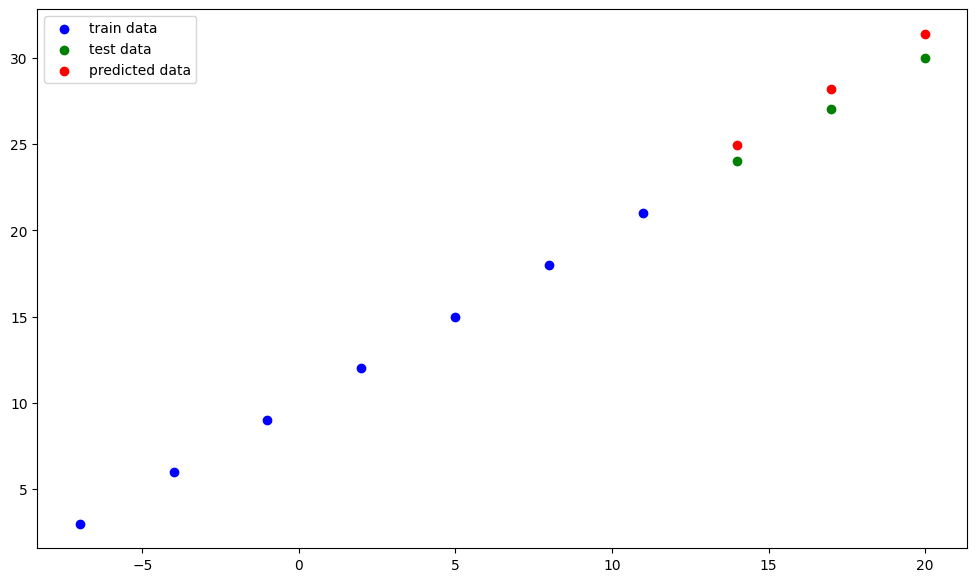

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=['mae'])

model.fit(x_train,y_train,epochs=30)

y_predicts = model.predict(x_test)

plt.figure(figsize=(12,7))
plt.scatter(x=x_train, y=y_train, c='blue', label='train data')
plt.scatter(x=x_test, y=y_test, c='green', label='test data')
plt.scatter(x=x_test, y=y_predicts, c='red', label='predicted data')
plt.legend()
plt.show()

In [32]:
model.save('first_save.keras', save_format='keras')

In [35]:
model = tf.keras.models.load_model("first_save.keras")

AttributeError: 'Adam' object has no attribute 'build'